# Speciale Demo

Load packages and image loading function

In [1]:
import numpy as np
import NNAccelerator
import time
from PIL import Image
from IPython.display import display

def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    img = img.convert('RGB')
    data = np.asarray(img,dtype=np.uint8)
    return  data

set NN and bit file

In [2]:
VGG16Version = 'VGG_16'
cnnName = 'VGG16'

bitFileName = 'cnna6.16.8.3.800'
    
dataset = '_detect'

bitFile = 'bitFiles/' + bitFileName + '/' + bitFileName + '.bit'
cnnSpec = 'cnnSpecs/' + cnnName + '/' + cnnName+ dataset + '.json'
cnnWeights = 'cnnSpecs/' + cnnName + '/' + cnnName + dataset + '_pre_'+ bitFileName+ '.h5'

Initialize CNNA

In [3]:
beforeAccLoad = time.time()
acc = NNAccelerator.NNAccelerator(bitfile = bitFile, 
                                  NNJsonSpec = cnnSpec, 
                                  H5Weights = cnnWeights, 
                                  preConverted = True, 
                                  preAlligned = True,
                                  verboseLevel = 0.2,
                                  dmaSafe = True)
afterAccLoad = time.time()
print('Loading time: ',afterAccLoad-beforeAccLoad)

dataW:  16 , dataP:  2 , dmaBW:  8 , PE_N:  8 , peBwN:  8 , dataOut:  3 , wbufSize:  800
input_1 , kernelSize:  0 , nFilters:  0, filtersPrSplit:  0 , nSplits:  1 , outputSize:  [224, 224, 3]
, paddingSize:  1.0block1_conv1 , kernelSize:  [3, 3] , nFilters:  64, filtersPrSplit:  64 , nSplits:  1.0 , outputSize:  (224.0, 224.0, 64)
, paddingSize:  1.0block1_conv2 , kernelSize:  [3, 3] , nFilters:  64, filtersPrSplit:  64 , nSplits:  1.0 , outputSize:  (224.0, 224.0, 64)
, paddingSize:  0block1_pool , kernelSize:  [2, 2] , nFilters:  0, filtersPrSplit:  0 , nSplits:  1 , outputSize:  (112.0, 112.0, 64)
, paddingSize:  1.0block2_conv1 , kernelSize:  [3, 3] , nFilters:  128, filtersPrSplit:  128 , nSplits:  1.0 , outputSize:  (112.0, 112.0, 128)
, paddingSize:  1.0block2_conv2 , kernelSize:  [3, 3] , nFilters:  128, filtersPrSplit:  128.0 , nSplits:  1.0 , outputSize:  (112.0, 112.0, 128)
, paddingSize:  0block2_pool , kernelSize:  [2, 2] , nFilters:  0, filtersPrSplit:  0 , nSplits:  1 , 

load and display image

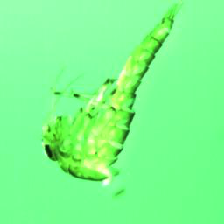

In [10]:
imageFile = 'detect/detect3_1.jpg'
img = load_image(imageFile)
x = np.expand_dims(img,axis=0)
display(Image.fromarray(img))

predict

In [11]:
before = time.time()
t, out = acc.predict(x)
after = time.time()
print('time: ', t, ', class: ', out)

starting prediction
time taken:  2.2711708545684814
time:  2.2711708545684814 , class:  2
